In [1]:
import time
import os

In [2]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [3]:
import cv2

In [4]:
os.getcwd()

'C:\\Users\\sreenaths\\Documents\\Gain-Insights Notebooks\\Image'

In [5]:
os.chdir('C:\\Images\\DataSets\\CV Dataset\\Insight-MVT_Annotation_Train\\MVI_20011')

In [6]:
train_images_path = 'C:/Images/DataSets/CV Dataset/Insight-MVT_Annotation_Train/MVI_20011/'
train_images      = os.listdir()

In [7]:
print('The number of images in training set : %s' %len(train_images))

The number of images in training set : 664


In [8]:
labelsPath   = 'C:/Yolo-Object-Detection/yolo-coco/coco.names'

In [9]:
LABELS       = open(labelsPath).read().strip().split("\n")

In [10]:
#sample labels in coco dataset
LABELS[:5]

['person', 'bicycle', 'car', 'motorbike', 'aeroplane']

In [11]:
print('List of lables in coco dataset : {} !!! Total labels : [ {} ]'.format(LABELS,len(LABELS)))

List of lables in coco dataset : ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'] !!! Total labels : [ 80 ]


In [12]:
#creating colors for boxes
COLORS       = np.random.randint(0,255, size = (len(LABELS),3), dtype = 'uint8' )

In [13]:
weightsPath  = 'C:/Yolo-Object-Detection/yolo-coco/yolov3.weights'

configPath   = 'C:/Yolo-Object-Detection/yolo-coco/yolov3.cfg'

In [14]:
#loading yolo object detector model trained on coco dataset
net          = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [15]:
#total layers is 254
ln           = net.getLayerNames()
print('Total number of layers in getLayerNames : {}'.format(len(ln)))

Total number of layers in getLayerNames : 254


In [16]:
#sample getLayerNames
ln[:5]

['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1']

In [17]:
# net.getUnconnectedOutLayers() contains of np.array([ [200], [227], [254] ])
ln           = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

#type of yolo used
print(ln)

['yolo_82', 'yolo_94', 'yolo_106']


In [18]:
image           = cv2.imread( os.path.join(train_images_path, train_images[0]) )

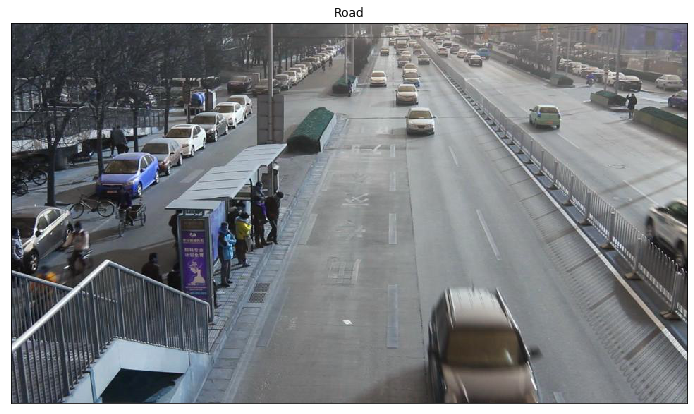

In [19]:
plt.figure(figsize = (45,7))
plt.imshow(image)
plt.xticks([]),plt.yticks([])
plt.title('Road')
plt.show()

In [20]:
print('Height : {} ! widght : {} ! channel : {} : of the image'.format(image.shape[0],image.shape[1],image.shape[2]))

Height : 540 ! widght : 960 ! channel : 3 : of the image


In [21]:
#extracting height, width
(H, W)  = image.shape[:2]

In [22]:
# construct a blob from the input image and then perform a forward
# pass of the YOLO object detector, giving us our bounding boxes and
# associated probabilities
blob             = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
net.setInput(blob)
layerOutputs     = net.forward(ln)    

In [23]:
print('Total number of lists in layerOutputs : {}'.format(len(layerOutputs)))

Total number of lists in layerOutputs : 3


In [24]:
for i in range(len(layerOutputs)):
    
    print( str(i + 1) + ' layerOutput number of elements in the list : {}'.format(len(layerOutputs[i])) )

1 layerOutput number of elements in the list : 507
2 layerOutput number of elements in the list : 2028
3 layerOutput number of elements in the list : 8112


In [25]:
box = layerOutputs[2][870][:5]

print('In 1st layerOutputs 1st element is a list which consist of a grid output Y')
print('This Y consist of [ pc, bx, by, bh, bw ] + [80 class labels] : total : {}'.format(len(layerOutputs[2][870])))
print('\n')
print('Box coordinates : {}'.format(box))

In 1st layerOutputs 1st element is a list which consist of a grid output Y
This Y consist of [ pc, bx, by, bh, bw ] + [80 class labels] : total : 85


Box coordinates : [0.5823851  0.10732807 0.02433032 0.02628776 0.82872194]


In [26]:
#class label probability of that praticular grid
score = layerOutputs[2][870][5:]
print('The length of the class labels : {}'.format(len(layerOutputs[2][870][5:])) )
print(list(score))

The length of the class labels : 80
[0.0, 0.0, 0.8270209, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [27]:
#extracting the list postion of the class probability & storing it in class id
classID = np.argmax(score)
print('The list location of the class probability : {}'.format(classID) )

The list location of the class probability : 2


In [28]:
#the class probability of the class and name of the class
confidence = score[classID]

print('Name of the class label : {} & probability score : {}'.format(LABELS[classID],confidence) )

Name of the class label : car & probability score : 0.8270208835601807


In [29]:
print('Box : {}'.format(list(box)) )
print('Box [pc] : {}'.format(box[4]) )

Box : [0.5823851, 0.10732807, 0.024330322, 0.02628776, 0.82872194]
Box [pc] : 0.8287219405174255


In [30]:
print('H : {} , W : {}'.format(H,W) )

H : 540 , W : 960


In [31]:
coordinates = [0.5823851, 0.10732807, 0.024330322, 0.02628776] * np.array([W, H, W, H])
print(coordinates)

[559.089696    57.9571578   23.35710912  14.1953904 ]


In [32]:
(centerX, centerY, width, height) = coordinates.astype("int")

In [33]:
x = int(centerX - (width / 2))
y = int(centerY - (height / 2))

In [34]:
boxes        = [x, y, int(width), int(height)]
boxes

[547, 50, 23, 14]

In [35]:
(x, y) = (boxes[0], boxes[1])
(w, h) = (boxes[2], boxes[3])

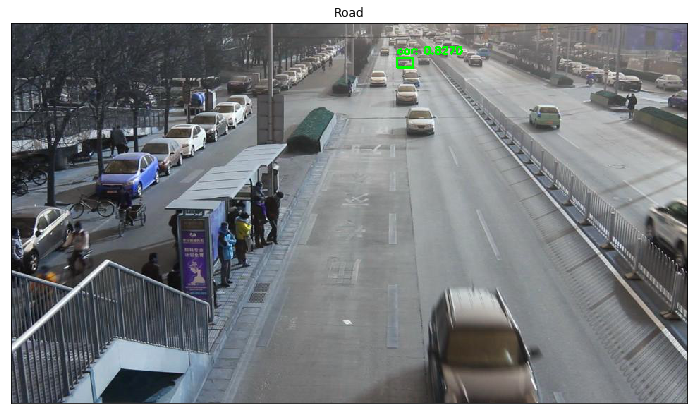

In [36]:
# draw a bounding box rectangle and label on the image
color  = (0, 255, 0)
text   = "{}: {:.4f}".format(LABELS[classID], confidence)

cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
cv2.putText  (image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)

plt.figure(figsize = (45,7))
plt.imshow(image)
plt.xticks([]),plt.yticks([])
plt.title('Road')
plt.show()